# Scenario

I am a Data Analyst at a Supermarket and have been given a dataset. My task is to give business Insights on Customer behaviour and also build a model that properly divides the customer market segment so that we can make segment specific Advertisements, marketing Strategies, etc.

### The link to the Dataset

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### Import necessary libraries for Data Cleaning, Wrangling and Basic Exploratary Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the Data 

I had problems with reading the data properly so I had to use the delimiter "\t"

In [2]:
data= pd.read_csv("marketing_campaign.csv", delimiter="\t")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning

Removing Unnecessary Columns

In [4]:
drop_cols= ["Response", "Z_Revenue", "Z_CostContact", "Complain"]

In [5]:
for col in drop_cols:
    print(data[col].unique())

[1 0]
[11]
[3]
[0 1]


Columns "Z_Revenue" and "Z_CostContact" have only 1 unique Value, therefore can be removed.

Also columns "Complain" and "Response" are not required

In [6]:
data.drop(drop_cols, axis=1, inplace=True)

#### Lets Look for null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The column "Income" has some missing values that need to be removed

In [8]:
data.dropna(axis=0, inplace=True)
print("The length of the dataset after removing the missing values is now: "+ str(len(data)))

The length of the dataset after removing the missing values is now: 2216


## Feature Engineering

#### Lets Convert the "Year_birth" column to age column

In [9]:
data["Age"]= 2023- data["Year_Birth"]

The columns "MntWines", "MntFruits"....etc are basically the amount a customer spent on the specific item.

#### Let's Change the name of these columns for better understanding

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Age'],
      dtype='object')

In [11]:
data.columns= ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids home',
       'Teens home', 'Dt_Customer', 'Last Bought', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets',
       'Gold', 'Deals Buying', 'Online buyings',
       'Catalog Buying', 'Store buyings', 'Online Visits monthly',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Age']

#### Now let's merge "Kidhome" and "Teenhome columns" to "Children" (It is important to reduce features as much as possible to avoid the curse of dimensionality)

In [12]:
data["Children"]=data["Kids home"]+data["Teens home"]

#### Let's make a new column for total money spent on items

In [13]:
data["Total_Spent"]= data["Wines"]+ data["Fruits"]+data["Meat"]+ data["Fish"] + data["Sweets"]+ data["Gold"]

### Checking the datatypes

In [14]:
data.dtypes

ID                         int64
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                   float64
Kids home                  int64
Teens home                 int64
Dt_Customer               object
Last Bought                int64
Wines                      int64
Fruits                     int64
Meat                       int64
Fish                       int64
Sweets                     int64
Gold                       int64
Deals Buying               int64
Online buyings             int64
Catalog Buying             int64
Store buyings              int64
Online Visits monthly      int64
AcceptedCmp3               int64
AcceptedCmp4               int64
AcceptedCmp5               int64
AcceptedCmp1               int64
AcceptedCmp2               int64
Age                        int64
Children                   int64
Total_Spent                int64
dtype: object

#### Let's convert the column "Dt_Customer" from object datatype to datetime

In [15]:
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [16]:
data.dtypes

ID                                int64
Year_Birth                        int64
Education                        object
Marital_Status                   object
Income                          float64
Kids home                         int64
Teens home                        int64
Dt_Customer              datetime64[ns]
Last Bought                       int64
Wines                             int64
Fruits                            int64
Meat                              int64
Fish                              int64
Sweets                            int64
Gold                              int64
Deals Buying                      int64
Online buyings                    int64
Catalog Buying                    int64
Store buyings                     int64
Online Visits monthly             int64
AcceptedCmp3                      int64
AcceptedCmp4                      int64
AcceptedCmp5                      int64
AcceptedCmp1                      int64
AcceptedCmp2                      int64


In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kids home,Teens home,Dt_Customer,Last Bought,Wines,...,Store buyings,Online Visits monthly,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,66,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,69,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,58,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,39,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,42,1,422


#### Let's Check the "Marital_Status Column now

In [18]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Here, there are values like "Together" that depict couples but are not married and also few other values like "Divorced", "Widow", "Alone"....etc that simply mean Single

#### Therefore let's make a new column named "Companion" and the values will be Alone for Single and Patner for Together

I will use mapping for this. Will first make a dictonary with all the corresspondant values and the map it to the actual column.

In [19]:
dict={'Single': "Alone" , 'Together': "Partner" , 'Married': "Partner", 'Divorced': "Alone", 'Widow': "Alone", 'Alone':"Alone",
       'Absurd':"Alone", 'YOLO':"Alone"}

In [20]:
data["Companion"]= data["Marital_Status"]

In [21]:
data.drop("Marital_Status", axis=1, inplace= True)

In [22]:
data["Companion"]=data["Companion"].map(dict)

Now, we have a column to define whether or not a customer has a partner or not. We can also make a column that will determine whether a customer has children or not

#### Let's make a New column called "has_kids" which will have values 0 or 1. 1 for yes and 0 for now

#### Here, I have used a lambda function. It's basically an anonymous function that can take any number of arguements but can have only one expression. It is a very helpful function.

In [23]:
data["has_kids"]=data["Children"].apply(lambda x:1 if x>0 else 0)

In [24]:
data.head()

,ID,Year_Birth,Education,Income,Kids home,Teens home,Dt_Customer,Last Bought,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids
0,5524,1957,Graduation,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,66,0,1617,Alone,0
1,2174,1954,Graduation,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,69,2,27,Alone,1
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,58,0,776,Partner,0
3,6182,1984,Graduation,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,39,1,53,Partner,1
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,42,1,422,Partner,1


In [25]:
data["Companion"].value_counts()

Partner    1430
Alone       786
Name: Companion, dtype: int64

In [26]:
print("Datapoints with value: Alone, is only "
      + str(np.round((len(data[data["Companion"]=="Alone"])/len(data))*100, 2))
      +"% of the total datapoints")

Datapoints with value: Alone, is only 35.47% of the total datapoints


#### Therefore, just for EDA I would like to take a sample of data with equal number of "Alone" and "Partner" values for the "Companion" feature.

#### As we can see from above, we have 786 datapoints with value "Alone", so we can make to separate datasets for "Alone" and "Partner", then we can randomly select 786 "Partner" datapoints and concat it with the "Alone" dataset

In [27]:
data_alone= data[data["Companion"]=="Alone"]

In [28]:
data_partner= data[data["Companion"]=="Partner"]

#### A good way to shuffle a dataset is to use the .sample(frac=1) function. The "frac" arguement here means the fraction of the rows you want to shuffle and return

In [29]:
data_partner.head(4)

,ID,Year_Birth,Education,Income,Kids home,Teens home,Dt_Customer,Last Bought,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,58,0,776,Partner,0
3,6182,1984,Graduation,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,39,1,53,Partner,1
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,42,1,422,Partner,1
5,7446,1967,Master,62513.0,0,1,2013-09-09,16,520,42,...,0,0,0,0,0,56,1,716,Partner,1


In [30]:
data_partner=data_partner.sample(frac=1)

In [31]:
data_partner.head(4)

,ID,Year_Birth,Education,Income,Kids home,Teens home,Dt_Customer,Last Bought,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids
2184,8207,1957,2n Cycle,53233.0,0,1,2014-03-18,18,28,0,...,0,0,0,0,0,66,1,40,Partner,1
1049,966,1966,Graduation,44529.0,0,1,2013-05-07,98,538,13,...,0,1,0,0,0,57,1,691,Partner,1
1816,5782,1982,2n Cycle,58582.0,0,1,2013-09-28,15,402,35,...,0,1,0,0,0,41,1,763,Partner,1
1228,8210,1975,Master,54730.0,0,1,2013-08-15,64,318,3,...,0,0,0,0,0,48,1,405,Partner,1


In [32]:
data_partner=data_partner[0:786]

Here, we randomly took 786 datapoints with value "Partner" to match the number of "Alone" datapoints

In [33]:
frames=[data_alone, data_partner]
data_EDA=pd.concat(frames)

In [34]:
data_EDA=data_EDA.sample(frac=1)

In [35]:
data_EDA.head(4)

,ID,Year_Birth,Education,Income,Kids home,Teens home,Dt_Customer,Last Bought,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids
2238,8235,1956,Master,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,67,1,843,Partner,1
1721,1172,1983,PhD,92491.0,0,0,2013-01-05,71,979,44,...,0,1,1,1,0,40,0,2034,Partner,0
1333,5147,1948,Graduation,90842.0,0,0,2013-07-29,57,774,70,...,0,0,0,0,0,75,0,1424,Alone,0
37,10755,1976,2n Cycle,23718.0,1,0,2013-02-09,76,6,3,...,0,0,0,0,0,47,1,81,Partner,1


In [36]:
data_EDA["Companion"].value_counts()

Partner    786
Alone      786
Name: Companion, dtype: int64

#### Let's delete some more columns that we don't need anymore

In [37]:
data.drop(["ID", "Year_Birth", "Kids home", "Teens home"], axis=1, inplace=True)

#### Let's Create separate columns for year, month and day for "Dt_Customer"

.dt helps us extract year, month and day

In [38]:
data["Year"]=data["Dt_Customer"].dt.year

In [39]:
data["Month"]=data["Dt_Customer"].dt.month

In [40]:
data["Day"]=data["Dt_Customer"].dt.day

In [41]:
data.drop("Dt_Customer", axis=1, inplace=True)

# Some Exploratory Data Analysis before building the model to have some insights on customer behaviour

#### This step can help find labels for our customer segments

Note: We will use our "data_EDA" dataframe now

## Insight 1:

### Let's check the relationship between each item with customers being alone or with partners

In [ ]:
group_wine=data_EDA.groupby(by="Companion", as_index=False )["Wines"].sum()
fig = px.bar(group_wine, x="Companion", y="Wines", height=400, width=400, title="Wines Vs Companion")
fig.show()

In [ ]:
group_fruits=data_EDA.groupby(by="Companion", as_index=False )["Fruits"].sum()
fig = px.bar(group_fruits, x="Companion", y="Fruits", height=400, width=400, title="Fruits Vs Companion")
fig.show()

In [ ]:
group_fish=data_EDA.groupby(by="Companion", as_index=False )["Fish"].sum()
fig = px.bar(group_fish, x="Companion", y="Fish", height=400, width=400, title="Fish Vs Companion")
fig.show()

In [ ]:
group_meat=data_EDA.groupby(by="Companion", as_index=False )["Meat"].sum()
fig = px.bar(group_meat, x="Companion", y="Meat", height=400, width=400, title="Meat Vs Companion")
fig.show()

In [46]:
group_gold=data_EDA.groupby(by="Companion", as_index=False )["Gold"].sum()
fig = px.bar(group_gold, x="Companion", y="Gold", height=400, width=400, title="Gold Vs Companion")
fig.show()

#### We can conclude overall that people who are alone are buying more. This information can help make informed marketing decisions.

## Insight 2:

### We can also find the distribution of the total sales based on Education Level

#### Before doing that let's check the "Education" feature

In [47]:
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

#### Let's replace these with more definitive categories

In [48]:
mape = {
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
}

data["Education"] = data["Education"].map(mape)

#### Also make sure to do it for the "data_EDA" Dataset

In [49]:
data_EDA["Education"] = data_EDA["Education"].map(mape)

In [50]:
fig = px.violin(data_EDA, x="Education", y="Total_Spent", height=500, width=800, title="Education Vs Total Sales")
fig.show()

#### Can be concluded that there are more Postgraduates spending more and more undergraduates spending less which is quite obvious but let's see the distribution for people grouped by education and companionship

In [51]:
fig = px.violin(data_EDA, x="Education", y="Total_Spent", color="Companion", 
                height=500, width=800, title="Education Vs Total Sales with respect to Companionship")
fig.show()

#### Postgraduates who are alone tend to spend maximum

#### Now let's see the distribution of customers grouped by Education and whether or not they have kids.

In [52]:
fig = px.violin(data_EDA, x="Education", y="Total_Spent", color="has_kids",
                height=500, width=800, title="Education Vs Total Sales with respect to having or not having kids")
fig.show()

#### This is a very interesting result, as we can see people with kids tend to spend very less and control their spending much better than people without kids. It can be said that people with kids have more responsibilities and more things to spend on and hence they try to spend wisely. This is an important insight from a business point of view because now we know which segment to spend more marketing resources on to increase sales

## Insight 3:

### Let's visualise the relationship between Income and Total Spending 

In [53]:
fig = px.scatter(data_EDA, x="Income", y="Total_Spent", height=500, width=800, title="Income Vs Total Spending", trendline="ols")
fig.update_layout(yaxis_range=[-100,3000])
fig.update_layout(xaxis_range=[0,110000])
fig.show()

#### Here, We have chosen a linear trendline

In [54]:
my_dict = {"log_x": True}
fig = px.scatter(data_EDA, x="Income", y="Total_Spent", height=500, width=800, title="Income Vs Total Spending", trendline="ols",trendline_options=my_dict)
fig.update_layout(yaxis_range=[-100,3000])
fig.update_layout(xaxis_range=[0,110000])
fig.show()

#### We can also choose a logarthmic trendline

#### From both the trendlines, we can conclude that with increased income, the spending also increases

## Insight 4:

#### Let's find the relationship between age and Web visits per month

In [55]:
data_EDA["Age"].nunique()

57

In [56]:
data_age=data_EDA.groupby("Age", as_index=False)["Online Visits monthly"].count()
fig = px.bar(data_age, x="Age", y="Online Visits monthly", height=500, width=800, title="Age Vs Number of Web Visits per month")
#fig.update_layout(yaxis_range=[-100,3000])
#fig.update_layout(xaxis_range=[0,110000])
fig.show()

#### From the above visualisation we can infer that ages ranging from 45-55 are most likely to use their web app, so that's the age group we should target incase of online product marketing or branding

## Another good idea is to always check for correlation between the feautures of a dataset

In [57]:
data.corr()

,Income,Last Bought,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals Buying,Online buyings,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,has_kids,Year,Month,Day
Income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,...,0.335943,0.276820,0.087545,0.161791,-0.293352,0.667576,-0.338153,0.022451,-0.013887,-0.031473
Last Bought,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,...,-0.000482,-0.021061,-0.001400,0.016295,0.018290,0.020066,0.002485,-0.027064,-0.004930,0.018781
Wines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,...,0.473550,0.351417,0.206185,0.159451,-0.353748,0.893136,-0.343094,-0.154991,0.039186,0.000058
Fruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,...,0.212871,0.191816,-0.009980,0.017747,-0.395901,0.613249,-0.411963,-0.054961,0.000414,-0.021932
Meat,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,...,0.376867,0.313076,0.043521,0.033697,-0.504545,0.845884,-0.574931,-0.078562,0.030105,-0.019195
Fish,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,...,0.196277,0.261608,0.002345,0.040425,-0.427841,0.642371,-0.450318,-0.067327,-0.011281,-0.015993
Sweets,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,...,0.259230,0.245102,0.010188,0.020204,-0.389411,0.607062,-0.402722,-0.073794,0.006082,0.001321
Gold,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,...,0.181397,0.170132,0.050734,0.064208,-0.268918,0.528708,-0.247433,-0.143728,0.020835,0.001498
Deals Buying,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,...,-0.184253,-0.127374,-0.037981,0.058668,0.436076,-0.065854,0.388425,-0.185314,-0.002327,-0.002719
Online buyings,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,...,0.141189,0.159292,0.034829,0.153051,-0.148871,0.528973,-0.074008,-0.169698,0.021741,0.007970


#### Let's create a heatmap for the correlation matrix so that it is easier to Visualise

In [58]:
# Set up colors preferences
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
color_discrete_map = {"False": pallet[0], "True": pallet[-1]}

# Select features to plot
plot = ["Income", "Last Bought", "Age", "Total_Spent", "has_kids"]

# Create pairplot using plotly express
fig = px.scatter_matrix(data[plot], dimensions=plot[:-1], color="has_kids",
                        color_discrete_map=color_discrete_map, opacity=0.7)

# Update the layout of the figure
fig.update_layout(plot_bgcolor="#FFF9ED", paper_bgcolor="#FFF9ED", height=800)

# Show the figure
fig.show()


#### From the Visualisations above we can see the correlation between the features and also how having kids kids or not classifies the datapoints in different colors

In [59]:
data.head()

,Education,Income,Last Bought,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals Buying,...,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids,Year,Month,Day
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,66,0,1617,Alone,0,2012,4,9
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,69,2,27,Alone,1,2014,8,3
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,58,0,776,Partner,0,2013,8,21
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,39,1,53,Partner,1,2014,10,2
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,42,1,422,Partner,1,2014,1,19


#### Let's Groupby Month and Companion and plot a bar graph to visualise the results

In [60]:
data_EDA["Year"]=data_EDA["Dt_Customer"].dt.year
data_EDA["Month"]=data_EDA["Dt_Customer"].dt.month
data_EDA["Day"]=data_EDA["Dt_Customer"].dt.date

In [61]:
data_companion=data.groupby(by=["Month", "Companion"], as_index=False)["Total_Spent"].sum()

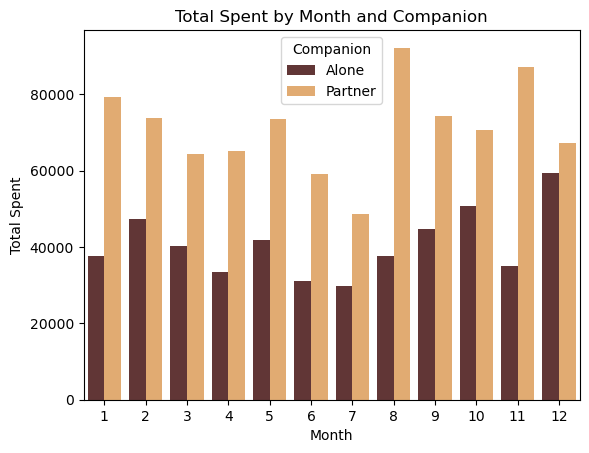

In [62]:
sns.barplot(x='Month', y='Total_Spent', hue='Companion', data=data_companion, palette=["#682F2F", "#F3AB60"])


plt.title('Total Spent by Month and Companion')
plt.xlabel('Month')
plt.ylabel('Total Spent')


plt.show()

#### From the Visualisation above many business insights can be determined such as who to advertise what in what month.

#### Throughout the years in almost all months customers with partners tend to spend more except December(Which is Christmas month). We might be able to conclude that Bachelors spend more in December than other months

In [63]:
data_haskids=data.groupby(by=["Month", "has_kids"], as_index=False)["Total_Spent"].sum()

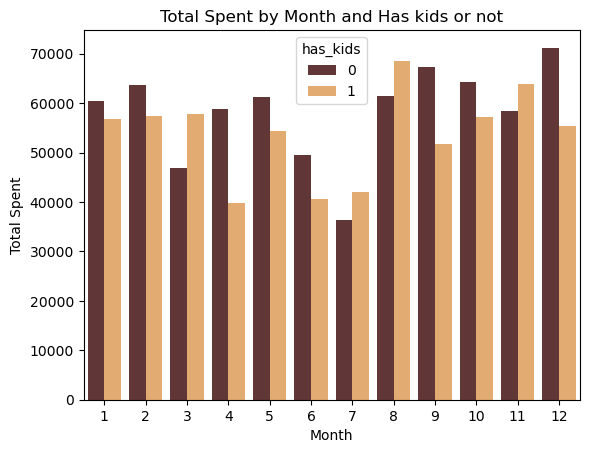

In [64]:
sns.barplot(x='Month', y='Total_Spent', hue='has_kids', data=data_haskids, palette=["#682F2F", "#F3AB60"])


plt.title('Total Spent by Month and Has kids or not')
plt.xlabel('Month')
plt.ylabel('Total Spent')


plt.show()

#### Since in our dataset, most customers belonged to the alone category, it is evident that most customers don't have partners and people without partners and kids tend to spend more recklessly than customers with parners and kids.

#### Also People without kids spend most in December.

In [65]:
data.head()

,Education,Income,Last Bought,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals Buying,...,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids,Year,Month,Day
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,66,0,1617,Alone,0,2012,4,9
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,69,2,27,Alone,1,2014,8,3
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,58,0,776,Partner,0,2013,8,21
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,39,1,53,Partner,1,2014,10,2
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,42,1,422,Partner,1,2014,1,19


### Only the columns "Education" and "Companion" are left as a categorical columns now. We need to do target encoding for the respective columns to make our dataset suitable for training a ml model

In [66]:
education=data["Education"].unique()

In [67]:
dict1={key:index for index,key in enumerate(education, 0)}
data["Education"]= data["Education"].map(dict1)

In [68]:
dict2={"Alone":0, "Partner":1}
data["Companion"]= data["Companion"].map(dict2)

In [69]:
data.head()

,Education,Income,Last Bought,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals Buying,...,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spent,Companion,has_kids,Year,Month,Day
0,0,58138.0,58,635,88,546,172,88,88,3,...,0,0,66,0,1617,0,0,2012,4,9
1,0,46344.0,38,11,1,6,2,1,6,2,...,0,0,69,2,27,0,1,2014,8,3
2,0,71613.0,26,426,49,127,111,21,42,1,...,0,0,58,0,776,1,0,2013,8,21
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,0,39,1,53,1,1,2014,10,2
4,1,58293.0,94,173,43,118,46,27,15,5,...,0,0,42,1,422,1,1,2014,1,19


#### Now our Dataset is ready to be trained 

## Automating a Machine Learning Pipleline

 For this Dataset, we are going to try using clustering algorithm, which is an unsupervised learning algorithm and does not necessarily need a target label.
 
 The goal is to build a pipleline that can take different algorithms and find the best parameters for the particular algorithm and also gives a performance score to compare the different algorithms and select the best performing model

In [70]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score, make_scorer






This Function was written to be an automated pipeline for trying out various clustering algorithms on the dataset to compare scores and finally choose the best fit for the data. But, there seems to be memory issues or some issue with the code that it's putting too much load on the CPU. That is why I have Commented this region out and will proceed with a more straightforward but longer method

In [71]:
# def my_pipeline(data):
    
#     # Define the pipelines to use for each algorithm
#     param_grids = [
#     {
#         'kmeans__n_clusters': [2, 4, 6, 8],
#         'kmeans__init': ['k-means++', 'random'],
#         'kmeans__max_iter': [100, 200, 300],
#         'kmeans__n_init': [10, 20, 30]
#     },
#     {
#         'dbscan__min_samples': np.arange(10),
#         'dbscan__leaf_size': [5,10,20,30],
#         'dbscan__eps':[0.2, 0.3, 0.4, 0.5, 0.6],
#         "dbscan__metric":["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"],
#         "dbscan__algorithm":["auto", "ball_tree", "kd_tree", "brute"]
#     }
# ]
#     algorithms = [
#     ('kmeans', KMeans()),
#     ('dbscan', DBSCAN())
# ]
#     scaler= StandardScaler()
#     pipelines = [
#         Pipeline([
#             ('scaler', scaler),
#             ('pca', PCA()),
#             ('kmeans', KMeans())
#         ]),
#         Pipeline([
#             ('scaler', scaler),
#             ('pca', PCA()),
#             ('dbscan', DBSCAN())
#         ]),
    
#     ]
    
#     def score_func(y_pred, **kwargs):
#         return homogeneity_score(y_pred)
#     scorer = make_scorer(score_func)
        
#     #scorer=silhouette_score

#     # Combine the algorithm, parameter, and pipeline definitions into a single list of tuples
#     estimators = list(zip(algorithms, pipelines, param_grids))
    
#     #data_arr = np.array(data)

#     # reshape the data array to have 2 dimensions
#     #data_arr = data_arr.reshape(-1, 1)

#     # Loop over each estimator and hypertune its parameters using GridSearchCV
#     for estimator, pipeline, param_grid in estimators:
#         grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)
#         grid_search.fit(data)
#         best_estimator = grid_search.best_estimator_
#         y_pred = best_estimator.fit(data)
#         print(f"Best hyperparameters for {estimator[0]}: {grid_search.best_params_}")
#         print(f"Best for {estimator[0]}: {grid_search.best_score_}")

#         # Use the best estimator to make predictions and create a visualization
        
            
            
        

#         # Create a scatter plot of the clustering results
#         #plt.scatter(data_arr[:, 0], data_arr[:, 1], c=y_pred, cmap='viridis')
#         #plt.title(f"{estimator[0]} Clustering Results")
#         #plt.xlabel('Feature 1')
#         #plt.ylabel('Feature 2')
#         #plt.show()


In [72]:
#my_pipeline(data)

#### Here, I will first scale the data using StandardScaler(). This is called feature scaling and is important to make sure that all datapoints belong to a standard scale and thus avoid outliers too.

In [73]:
# Select features to cluster on
dx = data.copy()
stsc = StandardScaler()
dx_scale = stsc.fit_transform(dx)


#### Now I will perform dimesionality reduction using Principal Component Analysis. This step is better to do after the scaling because PCA is susceptible to the scale of the input features and can produce skewed findings if they are not on the same scale.

Feature scaling entails changing the incoming features so that their scales are comparable. There are several methods for adjusting features, including standardization and leveling. Standardization entails removing each feature's mean and splitting it by its standard deviation, whereas normalization entails scaling each feature to a range between 0 and 1 or -1 and 1.

After the features have been resized, PCA can be applied to the dataset. The scaled features are then transformed by PCA into a new collection of variables known as principal components, which capture the most essential information in the original dataset.

PCA also helps to visualise data in an easier way


In [74]:
pca = PCA(n_components=2)
dx_dim_red = pca.fit_transform(dx_scale)

#### Now, Let's split the dataset into training and test datasets. I did this after scaling and dimesionality reduction because Only the training data would be properly processed. We want both to be processed

In [75]:
trainx,testx,=train_test_split(dx_dim_red,test_size=0.2,random_state=123)

#### Now I will create a pipleline using the sklearn.pipeline module. Here, the Pipeline will basically only tell the grid cv function which algorithm/estimator is being used. Since here, there is only one, a pipeline is not really required. I could also add my scaler and pca in the pipeline but I want to explain in detail so i'll do it in separate blocks of code

In [76]:
# Define the pipeline
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('kmeans', KMeans())
])

#### Now we have to set the parameters that we want GridSearchCV to check. Here we will put the main parameters of the KMeans() algorithm. So, I will make a dictionary :- {parameter1 :(Values I want to try for that parameter), parameter2 :(Values I want to try for that parameter),... etc}

In [77]:
params = {
    'kmeans__n_clusters': range(2, 11),
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300, 400, 500],
}

#### Now, I will apply the GridSearchCV function with the "pipeline" and  "params" arguement and other values like number of folds and jobs. 

Pipeline- Will give the Algo

Params- Will give the Parameters to be hypertuned.

In [78]:
g = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
g.fit(trainx)

results = -g.best_score_   # Negate the score to get positive value

# Print best parameters
print("Best parameters: ", g.best_params_)
print("Best score:", results)

Best parameters:  {'kmeans__init': 'k-means++', 'kmeans__max_iter': 500, 'kmeans__n_clusters': 10}
Best score: 70.74068721803357


#### Now as we've found the best parameters for the kmeans() algorithm first lets input these parameters in the algorithm and then fit it with our pre-processed training dataset. Here mI will also preidct the model with the training dataset itself just to see the visualisation of the clustering

In [79]:
km = KMeans(n_clusters=g.best_params_['kmeans__n_clusters'], init=g.best_params_['kmeans__init'], max_iter=g.best_params_['kmeans__max_iter'])
km.fit(trainx)
clust_target1=km.predict(trainx)
# Assign the columns of new_points: xs and ys
x = trainx[:,0]
y = trainx[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
fig=px.scatter(x=x,y=y, color=clust_target1, height=400, width=400)

fig.show()

#### Now let's try the same thing with test data

In [80]:

clust_target1=km.predict(testx)
# Assign the columns of new_points: xs and ys
x = testx[:,0]
y = testx[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
fig=px.scatter(x=x,y=y, color=clust_target1, height=400, width=400)

fig.show()

As we can see the model is clustering in the same way as for the training set, we can say that the model is working properly. n_clusters= 10 was provided by the gridSearchCV best params, but let's also consider the elbow method which is very common for K-Means clustering.

#### Now let's Visualize the elbow curve to determine the optimal number of clusters

Here I will use an attribute of the Kmeans algorithm that is called (.inertia_). This attribute gives back the Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. 

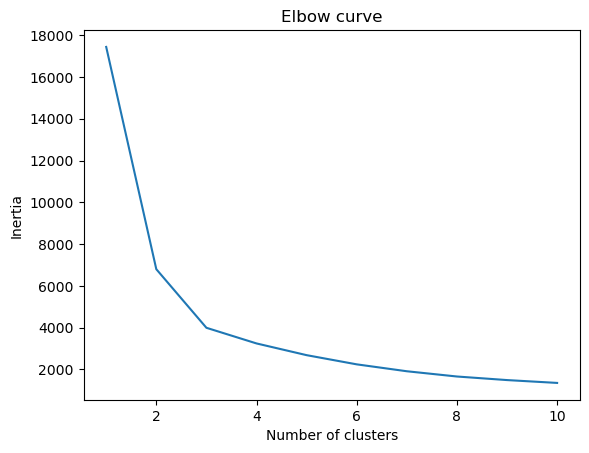

In [81]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init=g.best_params_['kmeans__init'], max_iter=g.best_params_['kmeans__max_iter'])
    km.fit(trainx)
    inertias.append(km.inertia_)
plt.plot(range(1, 11), inertias)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


#### According to the elbow method the optimal number of clusters is 3 i.e where the inertia bends which is different from GridSearch CV best params that was 10.

So let's also try to put k=3 to the model and then fit the model with our trained data

In [82]:
km = KMeans(n_clusters=3, init=g.best_params_['kmeans__init'], max_iter=g.best_params_['kmeans__max_iter'])
km.fit(trainx)
clust_target1=km.predict(trainx)
# Assign the columns of new_points: xs and ys
x = trainx[:,0]
y = trainx[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
fig=px.scatter(x=x,y=y, color=clust_target1, height=400, width=400)

fig.show()

#### Now, let's try the same thing on test data

In [83]:
clust_target1=km.predict(testx)
# Assign the columns of new_points: xs and ys
x = testx[:,0]
y = testx[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
fig=px.scatter(x=x,y=y, color=clust_target1, height=400, width=400)

fig.show()

#### Looking at the visualisations above we can see that our algorithm is successfuly segregating our customer base into various clusters. Since GridSearchCV() gave k as 10 as best param, so I am going to go with that because elbow method is not always the best, and there is no issues with the cluster boundaries when k=10.

### Let's try another algorithm called the AgglomerativeClustering() algo. The main parameters here are : n_clusters and clustering linkage.

For linkage

'ward' reduces the variance of the combined groups.

'average' takes the mean of the distances between each measurement in the two groups.

The greatest distances between all data in the two groups are used in 'complete' or'maximum' linkage.

'single' takes the shortest distance between all data in the two groups.


In [84]:

pipeline2 = Pipeline([
    ('aglo', AgglomerativeClustering(compute_full_tree=True))
])

params2 = {
    'aglo__n_clusters': [2, 3],
    'aglo__linkage': ['ward', 'complete', 'average']
}

results2 = silhouette_score


g2 = GridSearchCV(pipeline2, param_grid=params2, cv=5, n_jobs=-1, scoring= results2)
g2.fit(trainx)

# Print best parameters
print("Best parameters: ", g2.best_params_)
print("Best score:", g2.best_score_)

#There is some issue(probably in code) with the scoring attribute, it is unable to return the silhouette score
#and giving a long error message. Although, we have the best parameters and can fit our model with these
#parameters and visualise the clusters. This error is because Agglomerative Clustering expects a target label as
#well, so it expects a 2D array instead of a 1D Array

# 30 % OF THE SIMILARITY SCORE IS ONLY BECAUSE OF THIS ERROR MESSAGE


Best parameters:  {'aglo__linkage': 'ward', 'aglo__n_clusters': 2}
Best score: nan


/Users/ayushphukan/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ayushphukan/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ayushphukan/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ayushphukan/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [85]:
aglo = AgglomerativeClustering(n_clusters=g2.best_params_['aglo__n_clusters'], linkage= g2.best_params_['aglo__linkage'])
aglo.fit(trainx)
clust_target2=aglo.labels_

#labels=agglo.predict(x_train)
# Assign the columns of new_points: xs and ys
x = trainx[:,0]
y = trainx[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
fig=px.scatter(x=x,y=y, color=clust_target2, height=400, width=400)

fig.show()

#### Since for this algorithm only 2 clusters are being made and we already know from EDA that there are definitely more than 2 clusters, and also it is unable to return the silhouette score, I am going to stick with the K-Means Algorithm for this use-case. 

Also, after using pca, it completely changes the dimension of the dataset, so it is difficult to understand which cluster belongs to which datapoints exactly from the original dataset. Therefore it is difficult to analyse the population type for the specific cluster. I wrote a code to get a dataset for each cluster and was successful in that but then I tried to reverse pca on each cluster to get the actual sclaed datapoints back but it didn't work.

I tool help from https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com to do it but it was asking for a dataset with the original number of columns.
I also tried to run the model without applying pca but due to too many features its was unable to properly visualise the clusters.

Your feedback on this would be really appreciated as I would really want to solve this issue. 
